<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science in IoT<br/>Asignatura: Predictive Analytics</center>

# Challenge S1: Introducción a las series Temporales

## 0. Objetivo

<img src="bicicletas_chicago_challenge.jpg" style="float:right; height: 250px"></img>
El objetivo de este challenge es realizar el análisis de una serie temporal y eliminar sus componentes de estacionalidad y tendencia.

Vamos a utilizar el dataset de los alquileres de bicicletas de Chicago, pero en este caso utilizaremos como serie temporal el número de **alquileres de los usuarios registrados**.

Además, realizaremos el análisis con los **datos a nivel horario**, es decir, sin agrupar.

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
fig_size = (18,6)
fig_size_subplot = (14,7)

matplotlib.rcParams.update({'font.size': 12})



## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe con la serie temporal que incluya nuestra variable tiempo y el número de alquileres de usuarios registrados.

In [2]:
## Carga del fichero
data_path = 'hour_chicago.csv'
df_datos = pd.read_csv(data_path)

In [3]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_str    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


In [4]:
df_datos.head()

,date_str,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


In [5]:
## Creación de la variable tiempo
df_datos['date_hr'] = (df_datos['date_str'].map(str) + ' ' + df_datos['hr'].map(str) + ':00:00')
df_datos['date_hr'].tail()

17374    2012-12-31 19:00:00
17375    2012-12-31 20:00:00
17376    2012-12-31 21:00:00
17377    2012-12-31 22:00:00
17378    2012-12-31 23:00:00
Name: date_hr, dtype: object

In [6]:
## Creación del dataframe con nuestra serie temporal
df_datos['date'] = pd.to_datetime(df_datos['date_hr'], format='%Y-%m-%d %H:%M:%S')
df_datos.index = df_datos['date']

In [7]:
## Visualización de nuestra serie temporal
df_TimeSeriesData = pd.DataFrame(df_datos['registered'])
df_TimeSeriesData.head()

,registered
date,
2011-01-01 00:00:00,13
2011-01-01 01:00:00,32
2011-01-01 02:00:00,27
2011-01-01 03:00:00,10
2011-01-01 04:00:00,1


## 3. Componentes de una serie temporal

**P: ¿Qué componentes tiene nuestra serie temporal?**

Según se observa tiene componentes de estacionalidad y tendencia positiva.

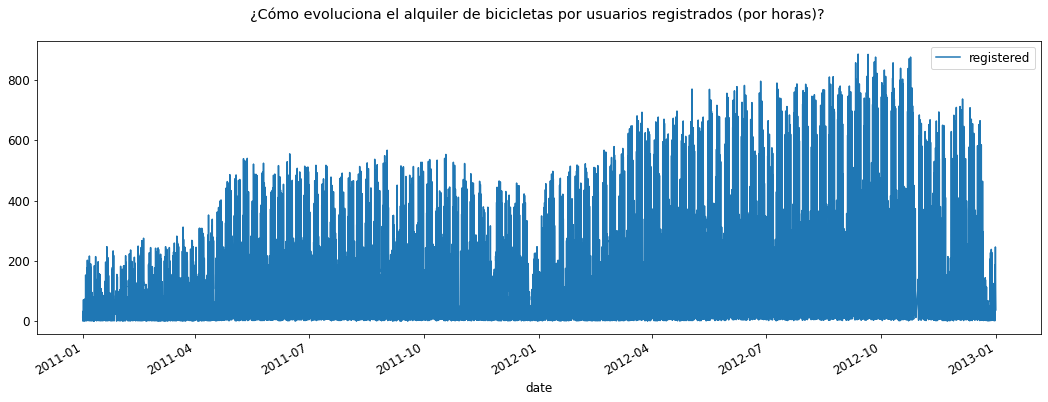

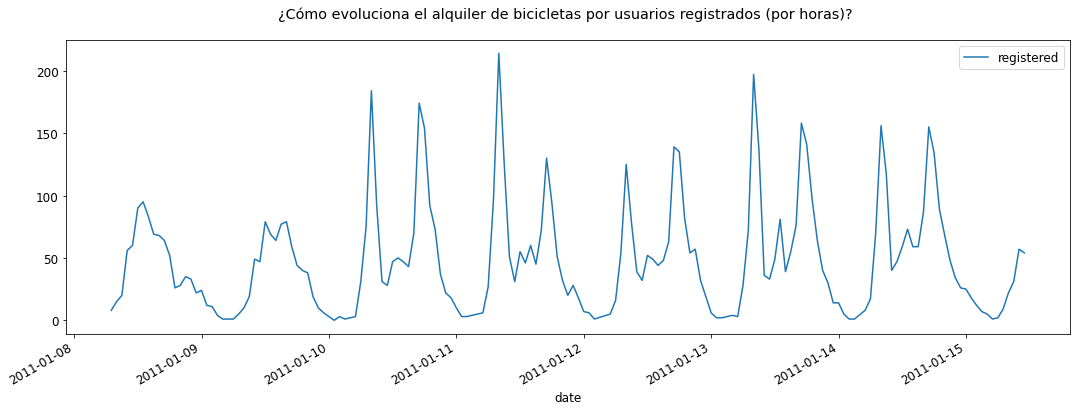

In [8]:
## Visualizamos nuestra serie temporal
df_TimeSeriesData.plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas por usuarios registrados (por horas)? \n')

## Hacemos un zoom sobre unos cuantos días para apreciar mejor el comportamiento
df_TimeSeriesData[(24*7):(24*7)*2].plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas por usuarios registrados (por horas)? \n');


**P: ¿Hay más de un tipo de estacionalidad?**

Si, para 'registered', alquiler de bicis por usuarios registrados, existe la estacionalidad anual, diaria y semanal. Muy similar a lo que sucedía con 'cnt' en el workseet.

### 3.1. Si existe componente estacional, elimínala y representa los resultados.

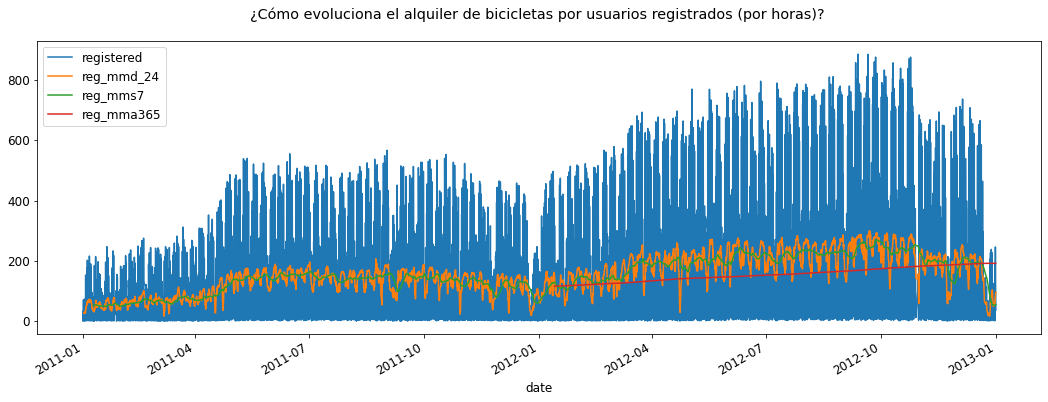

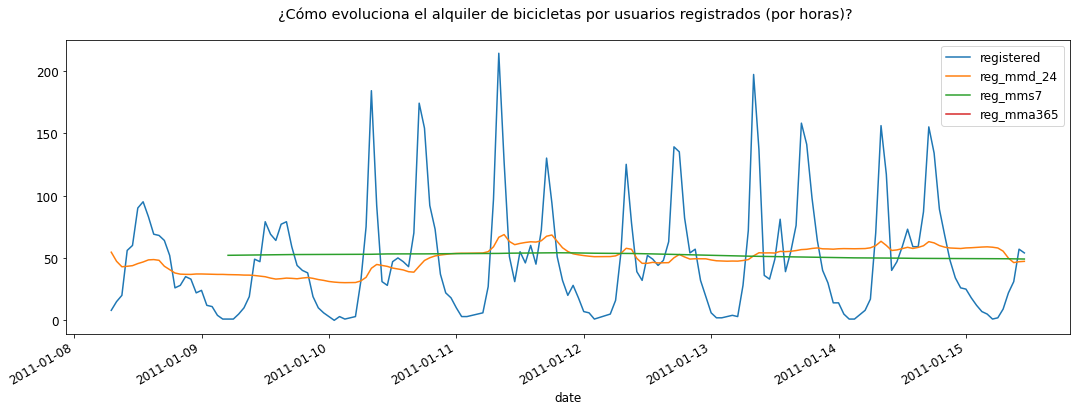

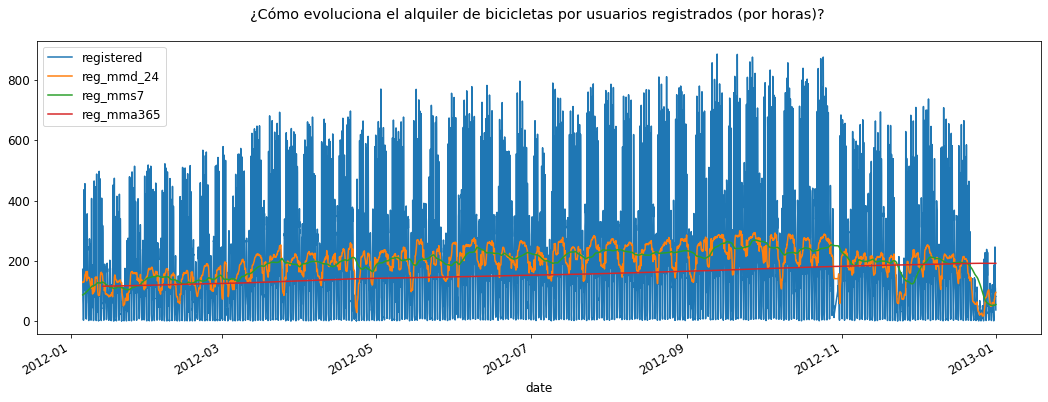

In [9]:
#Empezamos a hacer una media movil diaria.
df_moving_average = df_TimeSeriesData.copy()
df_moving_average['reg_mmd_24'] = df_moving_average.registered.rolling(24).mean()
df_moving_average['reg_mms7'] = df_moving_average.reg_mmd_24.rolling(24*7).mean()
df_moving_average['reg_mma365'] = df_moving_average.reg_mms7.rolling(24*365).mean()

## Visualizamos nuestra serie temporal
df_moving_average.plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas por usuarios registrados (por horas)? \n')

## Hacemos un zoom sobre una semana días para apreciar mejor el comportamiento
df_moving_average[(24*7):(24*7)*2].plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas por usuarios registrados (por horas)? \n')

## Hacemos un zoom sobre un mes para apreciar mejor el comportamiento
df_moving_average[(24*365):(24*365)*2].plot(figsize = fig_size,\
                        title = '¿Cómo evoluciona el alquiler de bicicletas por usuarios registrados (por horas)? \n');



* Hacemos una representación gráfica por separado de la serie con y sin estacionalidad

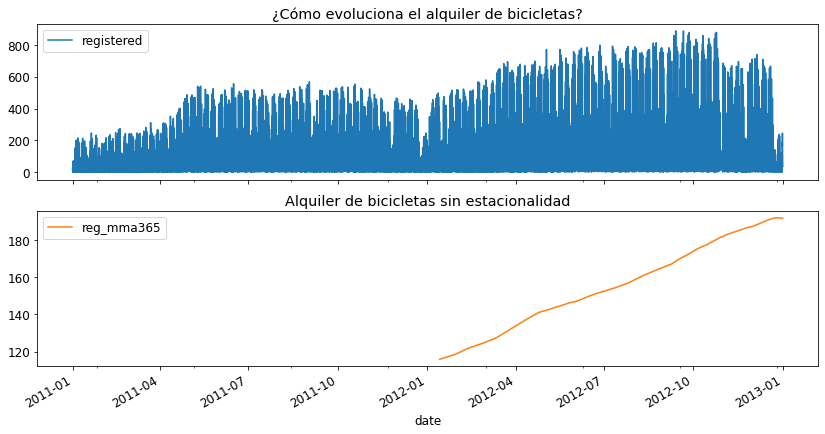

In [10]:
## Representamos la serie con y sin estacionalidad
df_moving_average.iloc[:,[0,3]].plot(subplots = True,
                                          title = ['¿Cómo evoluciona el alquiler de bicicletas?',\
                                                   'Alquiler de bicicletas sin estacionalidad'],
                                          figsize = fig_size_subplot);

### 3.2. Si existe tendencia, elimínala y representa los resultados.

In [11]:
# # Eliminamos la tendencia de la serie. Vamos a eliminar la tendencia anual, sumando de mes en mes.
df_moving_average['reg_mma365_shift'] = df_moving_average['reg_mma365'].shift(1)
df_moving_average['reg_mma365_sin_tendencia'] = df_moving_average['reg_mma365'] - \
                                                      df_moving_average['reg_mma365_shift']
df_moving_average.tail(10)

,registered,reg_mmd_24,reg_mms7,reg_mma365,reg_mma365_shift,reg_mma365_sin_tendencia
date,,,,,,
2012-12-31 14:00:00,185,79.750000,52.860119,191.684382,191.685027,-0.000645
2012-12-31 15:00:00,246,85.791667,53.036458,191.683761,191.684382,-0.000621
2012-12-31 16:00:00,184,89.208333,53.255704,191.683168,191.683761,-0.000594
2012-12-31 17:00:00,150,91.416667,53.505704,191.682602,191.683168,-0.000566
2012-12-31 18:00:00,112,91.375000,53.784722,191.682064,191.682602,-0.000537
2012-12-31 19:00:00,108,92.291667,54.087302,191.681561,191.682064,-0.000504
2012-12-31 20:00:00,81,93.041667,54.411954,191.681095,191.681561,-0.000466
2012-12-31 21:00:00,83,94.750000,54.755952,191.680667,191.681095,-0.000428
2012-12-31 22:00:00,48,95.500000,55.115079,191.680274,191.680667,-0.000393


* Hacemos una representación gráfica por separado de la serie, la serie sin estacionalidad y la serie sin tendencia

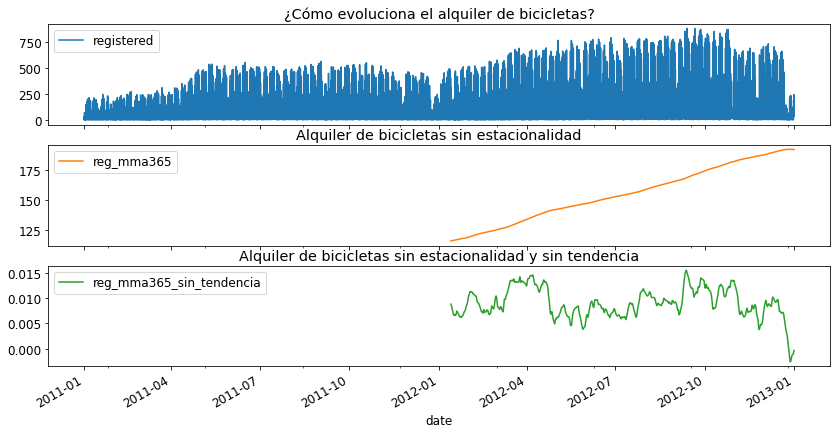

In [12]:
# Representamos la serie temporal, la serie sin estacionalidad y la serie sin tendencia 
df_moving_average.loc[:,['registered','reg_mma365','reg_mma365_sin_tendencia']].plot(subplots = True,
                                          title = ['¿Cómo evoluciona el alquiler de bicicletas?',\
                                                   'Alquiler de bicicletas sin estacionalidad', \
                                                   'Alquiler de bicicletas sin estacionalidad y sin tendencia'],
                                          figsize = fig_size_subplot);